
# Validación Cruzada

**Validación cruzada en regresión:** varias métricas y tiempo de ejecución

**cv**=10

cross_validate(model, X, Y, cv=**cv**, scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error'), return_train_score=True)

*Nota*: las métricas deben multiplicarse por -1 porque scikit-learn asume que "más grande es mejor"




In [ ]:
#Cargamos librerías principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Preparación de Datos


In [ ]:
#Cargamos los datos
data = pd.read_csv("videojuegos.csv")
data.head()

,videojuego,Edad,Sexo,Plataforma,Consumidor_habitual,Presupuesto para invertir
0,'Mass Effect',29,Mujer,PC,True,200
1,'Sim City',27,Mujer,Otros,True,600
2,'Dead Space',22,Hombre,'Xbox',False,200
3,'Battlefield',28,Mujer,'Xbox',True,370
4,'KOA: Reckoning',30,Mujer,PC,True,100


In [ ]:
#Conocemos los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   videojuego                 152 non-null    object
 1   Edad                       152 non-null    int64 
 2   Sexo                       152 non-null    object
 3   Plataforma                 152 non-null    object
 4   Consumidor_habitual        152 non-null    bool  
 5   Presupuesto para invertir  152 non-null    int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 6.2+ KB


In [ ]:
#Corrección de tipos de datos


In [ ]:
#Descripción de variables numéricas
data.describe()

,Edad,Presupuesto para invertir
count,152.000000,152.000000
mean,28.000000,343.289474
std,9.990724,291.945464
min,14.000000,20.000000
25%,21.000000,100.000000
50%,26.000000,275.000000
75%,34.000000,420.000000
max,52.000000,1200.000000


<Axes: >

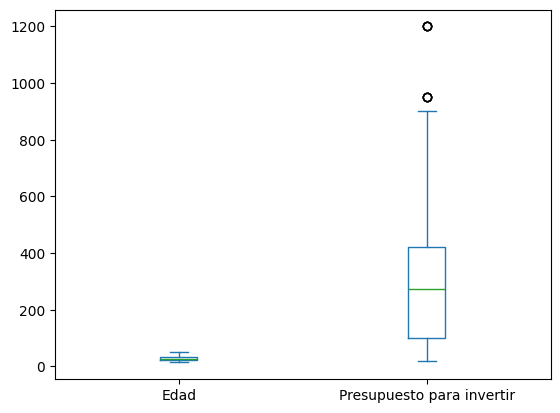

In [ ]:
data.plot(kind='box')

<Axes: xlabel='videojuego'>

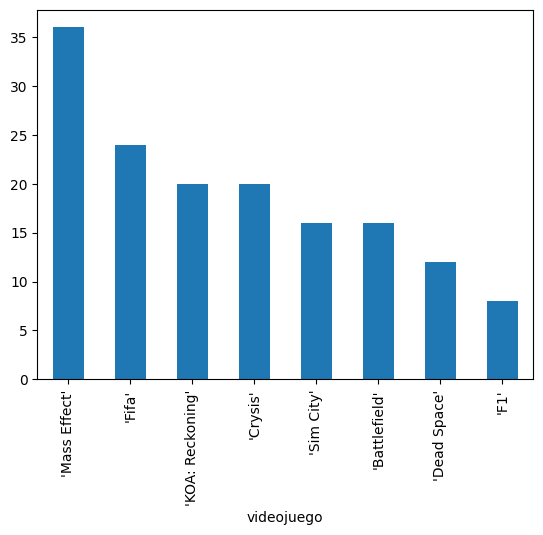

In [ ]:
#Descripción variables categóricas
data['videojuego'].value_counts().plot(kind='bar')

<Axes: xlabel='Plataforma'>

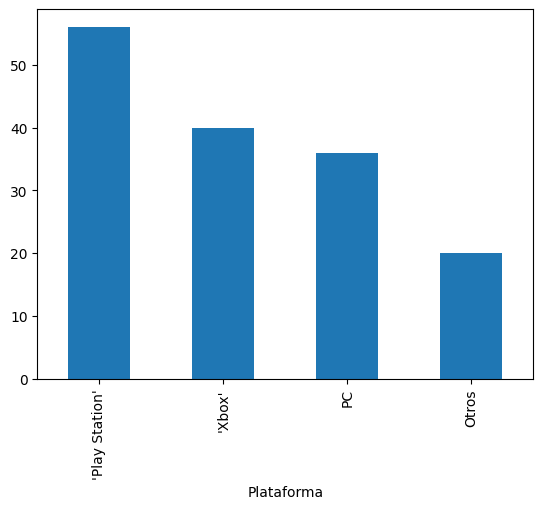

In [ ]:
data['Plataforma'].value_counts().plot(kind='bar')


<Axes: ylabel='count'>

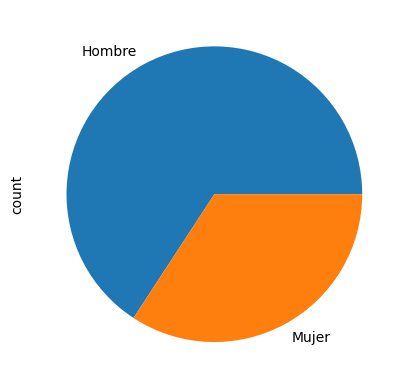

In [ ]:
data['Sexo'].value_counts().plot(kind='pie')

<Axes: xlabel='Consumidor_habitual'>

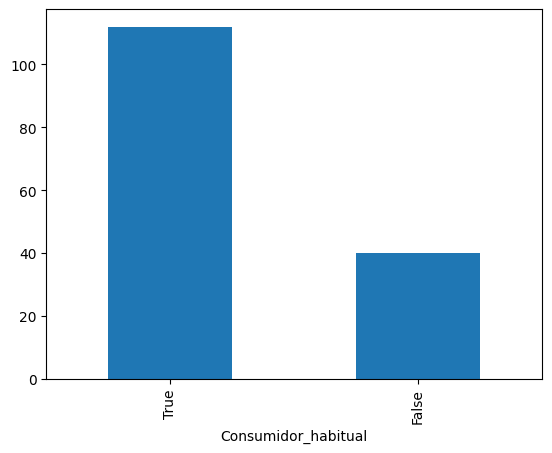

In [ ]:
data['Consumidor_habitual'].value_counts().plot(kind='bar')

In [ ]:
#Creamos variables dummy para convertir  las categorías a números
data = pd.get_dummies(data, columns=['videojuego', 'Plataforma'], drop_first=False, dtype=int)
data = pd.get_dummies(data, columns=['Sexo', 'Consumidor_habitual'], drop_first=True, dtype=int)
data.head()

#No hay labelencoder-> Variable objetivo ya es numérica

,Edad,Presupuesto para invertir,videojuego_'Battlefield',videojuego_'Crysis',videojuego_'Dead Space',videojuego_'F1',videojuego_'Fifa',videojuego_'KOA: Reckoning',videojuego_'Mass Effect',videojuego_'Sim City',Plataforma_'Play Station',Plataforma_'Xbox',Plataforma_Otros,Plataforma_PC,Sexo_Mujer,Consumidor_habitual_True
0,29,200,0,0,0,0,0,0,1,0,0,0,0,1,1,1
1,27,600,0,0,0,0,0,0,0,1,0,0,1,0,1,1
2,22,200,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,28,370,1,0,0,0,0,0,0,0,0,1,0,0,1,1
4,30,100,0,0,0,0,0,1,0,0,0,0,0,1,1,1


# 2. Validación Cruzada







In [ ]:
#Validación Cruzada
from sklearn.model_selection import cross_validate

#Dataframe para comparar los modelos
comparacion_CV=pd.DataFrame()

#Medidas de evaluación
scoring=('neg_mean_absolute_error', 'neg_mean_squared_error','neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error')

#Muestreo lineal
cv=10

In [ ]:
#Se separa variables predictoras y objetivo
X = data.drop("Presupuesto para invertir", axis = 1)
Y = data['Presupuesto para invertir']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Edad                         152 non-null    int64
 1   videojuego_'Battlefield'     152 non-null    int64
 2   videojuego_'Crysis'          152 non-null    int64
 3   videojuego_'Dead Space'      152 non-null    int64
 4   videojuego_'F1'              152 non-null    int64
 5   videojuego_'Fifa'            152 non-null    int64
 6   videojuego_'KOA: Reckoning'  152 non-null    int64
 7   videojuego_'Mass Effect'     152 non-null    int64
 8   videojuego_'Sim City'        152 non-null    int64
 9   Plataforma_'Play Station'    152 non-null    int64
 10  Plataforma_'Xbox'            152 non-null    int64
 11  Plataforma_Otros             152 non-null    int64
 12  Plataforma_PC                152 non-null    int64
 13  Sexo_Mujer                   152 non-null    int64

# TREE

In [ ]:
#Método de ML a usar en la validación cruzada
from sklearn import tree
modelTree = tree.DecisionTreeRegressor(criterion='squared_error', min_samples_leaf=7, max_depth=None)


scores = cross_validate(modelTree, X, Y, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
scores

,fit_time,score_time,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
0,0.003178,0.003803,-90.491071,-83.202922,-17294.781208,-14754.147489,-131.509624,-121.466652,-0.260251,-0.307711
1,0.003053,0.004993,-100.399975,-104.439575,-29450.194686,-23282.587633,-171.610590,-152.586328,-0.468749,-0.386277
2,0.002362,0.002935,-136.935065,-91.629538,-35968.460111,-19639.346542,-189.653526,-140.140453,-0.411257,-0.325126
3,0.002291,0.003002,-127.238095,-96.015294,-44263.560998,-23720.132082,-210.389071,-154.013415,-0.410303,-0.372275
4,0.002163,0.003010,-125.222156,-92.926130,-34533.585732,-19791.175443,-185.832144,-140.681113,-0.477834,-0.323006
5,0.002180,0.003042,-85.095238,-83.068316,-16384.093152,-14770.192988,-128.000364,-121.532683,-0.222998,-0.313610
6,0.002249,0.002947,-106.220579,-103.740945,-31402.274883,-23113.597279,-177.206870,-152.031567,-0.497817,-0.383623
7,0.004138,0.003460,-131.974026,-92.621291,-35790.988227,-19704.388726,-189.185063,-140.372322,-0.385954,-0.317221
8,0.002168,0.003532,-136.545455,-95.089140,-47062.402286,-24066.112744,-216.938706,-155.132565,-0.415056,-0.374327
9,0.002063,0.002948,-113.828571,-87.739628,-31828.490920,-18779.972825,-178.405412,-137.040041,-0.451999,-0.308118


In [ ]:
# Promedios para verificar overfitting comparando medidas en train y test
scores.mean()

#Cuidado overfitting, más de 5 puntos de diferencia

,0
fit_time,0.002585
score_time,0.003367
test_neg_mean_absolute_error,-115.395023
train_neg_mean_absolute_error,-93.047278
test_neg_mean_squared_error,-32397.883220
train_neg_mean_squared_error,-20162.165375
test_neg_root_mean_squared_error,-177.873137
train_neg_root_mean_squared_error,-141.499714
test_neg_mean_absolute_percentage_error,-0.400222
train_neg_mean_absolute_percentage_error,-0.341129


In [ ]:
#Se almacena en el df la medida a comparar
comparacion_CV['Tree']=scores['test_neg_mean_absolute_error']
print(comparacion_CV)

         Tree
0  -90.491071
1 -100.399975
2 -136.935065
3 -127.238095
4 -125.222156
5  -85.095238
6 -106.220579
7 -131.974026
8 -136.545455
9 -113.828571


# **Random Forest**

In [ ]:
#Método de ML a usar en la validación cruzada
from sklearn import ensemble
modelRf = ensemble.RandomForestRegressor(n_estimators=200, max_samples=0.8, criterion='squared_error', min_samples_leaf=2, max_depth=None)


scores = cross_validate(modelRf, X, Y, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
scores

,fit_time,score_time,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
0,0.465936,0.019996,-47.151425,-32.901460,-4971.224143,-2560.588024,-70.506908,-50.602253,-0.153003,-0.140322
1,0.257830,0.019568,-36.445885,-32.526759,-2666.874388,-2129.145940,-51.641789,-46.142669,-0.251580,-0.159331
2,0.259131,0.019201,-46.995391,-30.915967,-3010.987750,-1896.241918,-54.872468,-43.545860,-0.206199,-0.139453
3,0.254713,0.019521,-46.625134,-32.435832,-5840.982170,-2637.067451,-76.426319,-51.352385,-0.173686,-0.146959
4,0.273272,0.019175,-50.902574,-32.291693,-4073.773580,-2083.071550,-63.826120,-45.640679,-0.274787,-0.158269
5,0.255364,0.019025,-43.850959,-30.567714,-4957.050488,-2359.956073,-70.406324,-48.579379,-0.132286,-0.127555
6,0.259795,0.019939,-40.281283,-32.952493,-3188.844573,-2253.008602,-56.469855,-47.465868,-0.266223,-0.154946
7,0.271117,0.019455,-47.605927,-30.948632,-3355.257961,-2062.639558,-57.924589,-45.416292,-0.206355,-0.139252
8,0.260257,0.019935,-44.115108,-32.794642,-4900.528286,-2416.195758,-70.003773,-49.154814,-0.178662,-0.157269
9,0.260452,0.019333,-42.737861,-31.049633,-2986.547671,-1967.707794,-54.649315,-44.358852,-0.249126,-0.152953


In [ ]:
# Promedios para verificar overfitting comparando medidas en train y test
scores.mean()
#Cuidado overfitting, más de 5 puntos de diferencia

,0
fit_time,0.281787
score_time,0.019515
test_neg_mean_absolute_error,-44.671155
train_neg_mean_absolute_error,-31.938482
test_neg_mean_squared_error,-3995.207101
train_neg_mean_squared_error,-2236.562267
test_neg_root_mean_squared_error,-62.672746
train_neg_root_mean_squared_error,-47.225905
test_neg_mean_absolute_percentage_error,-0.209191
train_neg_mean_absolute_percentage_error,-0.147631


In [ ]:
#Se almacena en el df la medida a comparar
comparacion_CV['RF']=scores['test_neg_mean_absolute_error']
print(comparacion_CV)

         Tree         RF
0  -90.491071 -75.877665
1 -100.399975 -52.572309
2 -136.935065 -73.333084
3 -127.238095 -71.552603
4 -125.222156 -73.216214
5  -85.095238 -72.385518
6 -106.220579 -51.712349
7 -131.974026 -74.343609
8 -136.545455 -70.432357
9 -113.828571 -63.261482


# KNN

In [ ]:
#Normalizacion las variables numéricas (las dummies no se normalizan)
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
var_num=['Edad']
min_max_scaler.fit(X[var_num]) #Ajuste de los parametros: max - min
X[var_num]= min_max_scaler.transform(X[var_num]) #70%
X.head()

,Edad,videojuego_'Battlefield',videojuego_'Crysis',videojuego_'Dead Space',videojuego_'F1',videojuego_'Fifa',videojuego_'KOA: Reckoning',videojuego_'Mass Effect',videojuego_'Sim City',Plataforma_'Play Station',Plataforma_'Xbox',Plataforma_Otros,Plataforma_PC,Sexo_Mujer,Consumidor_habitual_True
0,0.394737,0,0,0,0,0,0,1,0,0,0,0,1,1,1
1,0.342105,0,0,0,0,0,0,0,1,0,0,1,0,1,1
2,0.210526,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,0.368421,1,0,0,0,0,0,0,0,0,1,0,0,1,1
4,0.421053,0,0,0,0,0,1,0,0,0,0,0,1,1,1


In [ ]:
#Validación Cruzada

#Método Perezoso
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=3, metric='euclidean')


scores = cross_validate(model_knn, X, Y, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe

scores



,fit_time,score_time,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
0,0.002985,0.003970,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1,0.002198,0.003712,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2,0.002166,0.003402,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
3,0.002143,0.003712,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
4,0.002114,0.003498,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
5,0.002178,0.003463,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
6,0.002227,0.003557,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
7,0.002124,0.004014,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
8,0.002210,0.004195,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
9,0.002194,0.003446,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [ ]:
# Promedios para verificar overfitting comparando medida de train y test
scores.mean()

# Muy sospechoso

,0
fit_time,0.002254
score_time,0.003697
test_neg_mean_absolute_error,0.000000
train_neg_mean_absolute_error,0.000000
test_neg_mean_squared_error,0.000000
train_neg_mean_squared_error,0.000000
test_neg_root_mean_squared_error,0.000000
train_neg_root_mean_squared_error,0.000000
test_neg_mean_absolute_percentage_error,0.000000
train_neg_mean_absolute_percentage_error,0.000000


In [ ]:
#Se almacena en el df la medida a comparar
comparacion_CV['Knn']=scores['test_neg_mean_absolute_error']
print(comparacion_CV)

         Tree         RF  Knn
0  -90.491071 -75.877665 -0.0
1 -100.399975 -52.572309 -0.0
2 -136.935065 -73.333084 -0.0
3 -127.238095 -71.552603 -0.0
4 -125.222156 -73.216214 -0.0
5  -85.095238 -72.385518 -0.0
6 -106.220579 -51.712349 -0.0
7 -131.974026 -74.343609 -0.0
8 -136.545455 -70.432357 -0.0
9 -113.828571 -63.261482 -0.0


# NN

In [ ]:
#Validación Cruzada: division, aprendizaje, evaluacion

#Red neuronal
from sklearn.neural_network import MLPRegressor
model_rn = MLPRegressor(activation="relu",hidden_layer_sizes=(200), learning_rate='adaptive',
                     learning_rate_init=0.7, momentum= 0.3, max_iter=500, verbose=False)


scores = cross_validate(model_rn, X, Y, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe

scores



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,fit_time,score_time,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
0,0.282358,0.004234,-9.643420,-7.475099,-1107.800580,-611.199992,-33.283638,-24.722459,-0.023112,-0.033125
1,0.274690,0.003744,-7.255709,-6.264156,-839.263120,-639.043694,-28.970038,-25.279314,-0.048383,-0.023960
2,0.242478,0.003589,-13.620858,-8.129221,-1234.648749,-608.565892,-35.137569,-24.669128,-0.047569,-0.040584
3,0.378026,0.003612,-8.863428,-6.722149,-917.557160,-636.163610,-30.291206,-25.222284,-0.055990,-0.026015
4,0.294258,0.003646,-2.833127,-7.954395,-41.922485,-716.642253,-6.474758,-26.770175,-0.006846,-0.032765
5,0.243393,0.003676,-10.727683,-8.259202,-1099.538279,-614.455556,-33.159286,-24.788214,-0.030860,-0.037203
6,0.347395,0.003432,-8.771717,-7.251494,-916.129170,-637.117250,-30.267626,-25.241182,-0.060580,-0.029707
7,0.392472,0.003884,-1.958140,-6.991834,-55.827546,-712.915264,-7.471783,-26.700473,-0.002285,-0.026856
8,0.281243,0.003602,-15.907734,-6.564089,-1623.801078,-544.766833,-40.296415,-23.340241,-0.066796,-0.025825
9,0.231127,0.003774,-4.936228,-9.597540,-90.082799,-727.944576,-9.491196,-26.980448,-0.013121,-0.042795


In [ ]:
# Promedios para verificar overfitting comparando medida de train y test
scores.mean()

,0
fit_time,0.296744
score_time,0.003719
test_neg_mean_absolute_error,-8.451804
train_neg_mean_absolute_error,-7.520918
test_neg_mean_squared_error,-792.657097
train_neg_mean_squared_error,-644.881492
test_neg_root_mean_squared_error,-25.484352
train_neg_root_mean_squared_error,-25.371392
test_neg_mean_absolute_percentage_error,-0.035554
train_neg_mean_absolute_percentage_error,-0.031884


In [ ]:
#Se almacena en el df la medida a comparar
comparacion_CV['Nn']=scores['test_neg_mean_absolute_error']
print(comparacion_CV)

         Tree         RF  Knn         Nn
0  -90.491071 -75.877665 -0.0  -9.643420
1 -100.399975 -52.572309 -0.0  -7.255709
2 -136.935065 -73.333084 -0.0 -13.620858
3 -127.238095 -71.552603 -0.0  -8.863428
4 -125.222156 -73.216214 -0.0  -2.833127
5  -85.095238 -72.385518 -0.0 -10.727683
6 -106.220579 -51.712349 -0.0  -8.771717
7 -131.974026 -74.343609 -0.0  -1.958140
8 -136.545455 -70.432357 -0.0 -15.907734
9 -113.828571 -63.261482 -0.0  -4.936228


<Axes: >

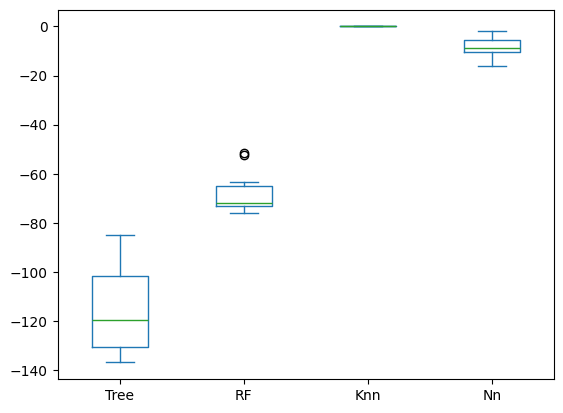

In [ ]:
#Resultados de la validación cruzada
comparacion_CV.plot(kind='box')

# 3. Hipótesis

H₀ (nula): No hay diferencia significativa en el desempeño (test_f1) entre los modelos.

H₁ (alternativa): Al menos un modelo tiene un desempeño significativamente diferente.

Se puede usar:
* ANOVA + Tukey
* Friedman + Nemenyi

Nota: Si no existe diferencia estadística significativa se selecciona el modelo por complejidad computacional. *texto en cursiva*

In [ ]:
comparacion_CV

,Tree,RF,Knn,Nn
0,-90.491071,-75.877665,-0.0,-9.643420
1,-100.399975,-52.572309,-0.0,-7.255709
2,-136.935065,-73.333084,-0.0,-13.620858
3,-127.238095,-71.552603,-0.0,-8.863428
4,-125.222156,-73.216214,-0.0,-2.833127
5,-85.095238,-72.385518,-0.0,-10.727683
6,-106.220579,-51.712349,-0.0,-8.771717
7,-131.974026,-74.343609,-0.0,-1.958140
8,-136.545455,-70.432357,-0.0,-15.907734
9,-113.828571,-63.261482,-0.0,-4.936228


# 4. Modelo final con todos los datos

In [ ]:

#Knn
model_knn.fit(X, Y) #100%


KNeighborsRegressor(metric='euclidean', n_neighbors=3)

In [ ]:

#NN
model_rn.fit(X, Y) #100%

MLPRegressor(hidden_layer_sizes=200, learning_rate='adaptive',
             learning_rate_init=0.7, max_iter=500, momentum=0.3)

In [ ]:
#Tree
X[var_num]= min_max_scaler.inverse_transform(X[var_num])
modelTree.fit(X, Y) #100%

DecisionTreeRegressor(min_samples_leaf=7)

[Text(0.390625, 0.9444444444444444, 'Consumidor_habitual_True <= 0.5\nsquared_error = 84671.416\nsamples = 152\nvalue = 343.289'),
 Text(0.125, 0.8333333333333334, 'Edad <= 0.263\nsquared_error = 6621.0\nsamples = 40\nvalue = 103.0'),
 Text(0.2578125, 0.8888888888888888, 'True  '),
 Text(0.0625, 0.7222222222222222, 'squared_error = 6666.667\nsamples = 12\nvalue = 200.0'),
 Text(0.1875, 0.7222222222222222, 'Plataforma_PC <= 0.5\nsquared_error = 840.816\nsamples = 28\nvalue = 61.429'),
 Text(0.125, 0.6111111111111112, 'Edad <= 0.408\nsquared_error = 368.75\nsamples = 16\nvalue = 42.5'),
 Text(0.0625, 0.5, 'squared_error = 100.0\nsamples = 8\nvalue = 60.0'),
 Text(0.1875, 0.5, 'squared_error = 25.0\nsamples = 8\nvalue = 25.0'),
 Text(0.25, 0.6111111111111112, 'squared_error = 355.556\nsamples = 12\nvalue = 86.667'),
 Text(0.65625, 0.8333333333333334, 'Edad <= 0.513\nsquared_error = 84560.81\nsamples = 112\nvalue = 429.107'),
 Text(0.5234375, 0.8888888888888888, '  False'),
 Text(0.5, 0.72

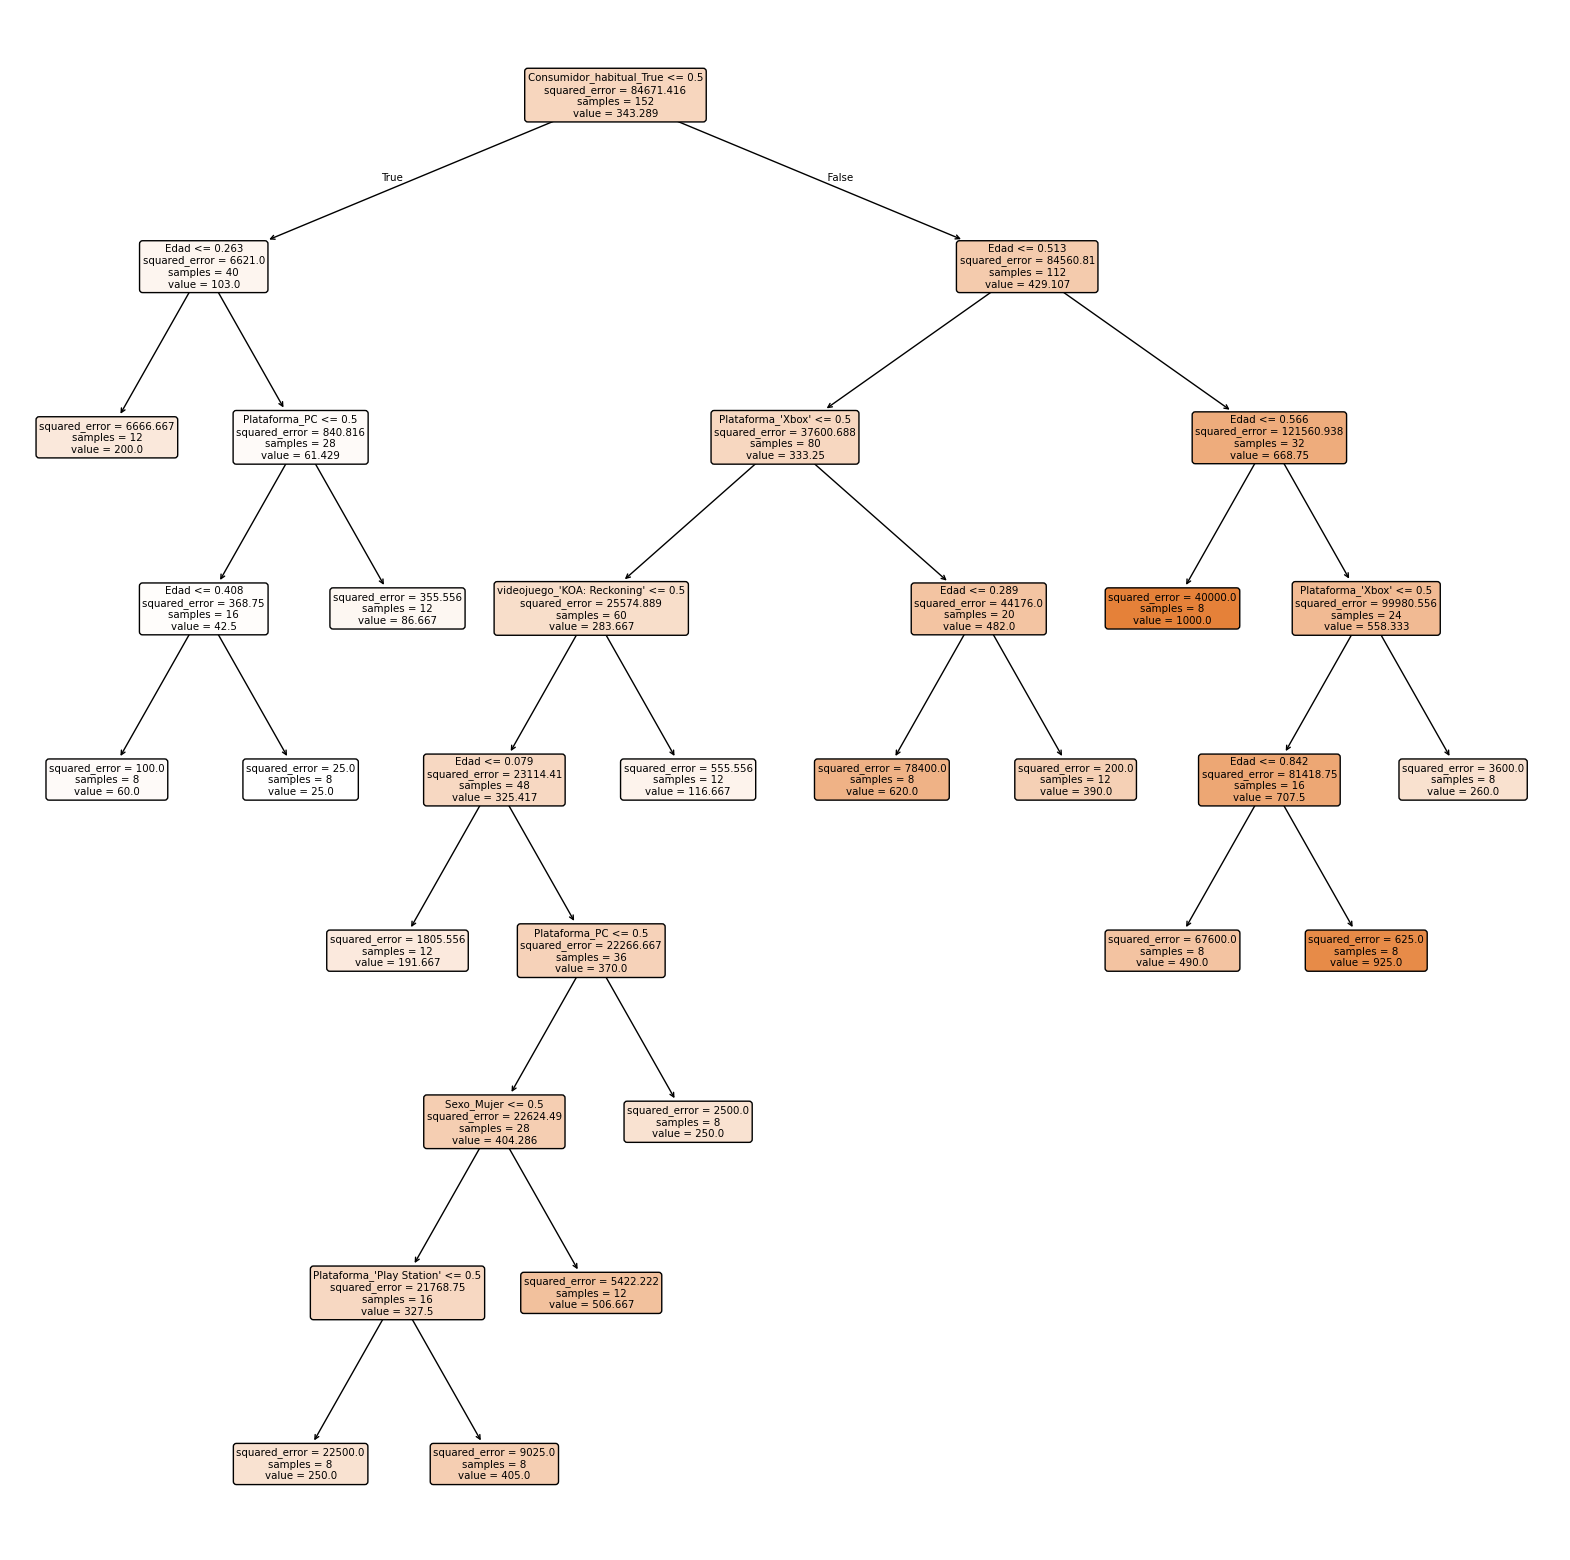

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(modelTree, feature_names=X.columns.values, rounded=True, filled=True)

# 4. Guardamos el modelo

In [ ]:
import pickle
filename = 'modelo.pkl'
variables=X.columns._values
pickle.dump([model_rn,variables,min_max_scaler], open(filename, 'wb'))